# Databel Churn Prediction 

Databel is a data-providing company that renders services to people in the United States and some parts of Europe. They are interested in understanding the prediction of customers that will churn with the dataset provided. 
A thorough EDA has been done with Microsoft Power BI to investigate the reason for customer churning behaviour. However, they are still interested in profiling a potential customer that can churn in order to reduce the possibility of having churning customers

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('Databel.csv')
df.head()


,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [485]:
df.shape

(6687, 29)

In [486]:
df.dtypes

Customer ID                           object
Churn Label                           object
Account Length (in months)             int64
Local Calls                            int64
Local Mins                           float64
Intl Calls                           float64
Intl Mins                            float64
Intl Active                           object
Intl Plan                             object
Extra International Charges          float64
Customer Service Calls                 int64
Avg Monthly GB Download                int64
Unlimited Data Plan                   object
Extra Data Charges                     int64
State                                 object
Phone Number                          object
Gender                                object
Age                                    int64
Under 30                              object
Senior                                object
Group                                 object
Number of Customers in Group           int64
Device Pro

From the dtypes observation phone number should not an object but it would remain like that since it is unique and doesn't have any predictive capabilities

In [487]:
#an overview of the descriptive statistics of the dataset
df.describe()

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [488]:
df.isnull().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [432]:
df.isnull().mean() * 100

Customer ID                           0.000000
Churn Label                           0.000000
Account Length (in months)            0.000000
Local Calls                           0.000000
Local Mins                            0.000000
Intl Calls                            0.000000
Intl Mins                             0.000000
Intl Active                           0.000000
Intl Plan                             0.000000
Extra International Charges           0.000000
Customer Service Calls                0.000000
Avg Monthly GB Download               0.000000
Unlimited Data Plan                   0.000000
Extra Data Charges                    0.000000
State                                 0.000000
Phone Number                          0.000000
Gender                                0.000000
Age                                   0.000000
Under 30                              0.000000
Senior                                0.000000
Group                                 0.000000
Number of Cus

In [433]:
#investigating churn category and churn reason further
df['Churn Category'].unique()


array([nan, 'Competitor', 'Other', 'Attitude', 'Dissatisfaction', 'Price'],
      dtype=object)

In [434]:
df['Churn Reason'].unique()

array([nan, 'Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Attitude of support person', 'Network reliability', "Don't know",
       'Service dissatisfaction', 'Product dissatisfaction',
       'Poor expertise of online support', 'Price too high',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Competitor offered more data',
       'Attitude of service provider', 'Poor expertise of phone support',
       'Extra data charges', 'Deceased',
       'Lack of self-service on Website'], dtype=object)

In [435]:
#73% of our dataset has missing values. Therefore, discarding the missing values is not an option because it has a significant meaning, i.e 
#the customers gave no feedback. The null values will be replaced with 'no response' for both features

df['Churn Category'].fillna('No response',inplace=True)
df['Churn Reason'].fillna('No response',inplace=True)


In [436]:
df.isnull().sum()

Customer ID                          0
Churn Label                          0
Account Length (in months)           0
Local Calls                          0
Local Mins                           0
Intl Calls                           0
Intl Mins                            0
Intl Active                          0
Intl Plan                            0
Extra International Charges          0
Customer Service Calls               0
Avg Monthly GB Download              0
Unlimited Data Plan                  0
Extra Data Charges                   0
State                                0
Phone Number                         0
Gender                               0
Age                                  0
Under 30                             0
Senior                               0
Group                                0
Number of Customers in Group         0
Device Protection & Online Backup    0
Contract Type                        0
Payment Method                       0
Monthly Charge           

In [437]:
#validating that the missing values have been handled.
df['Churn Category'].unique()

array(['No response', 'Competitor', 'Other', 'Attitude',
       'Dissatisfaction', 'Price'], dtype=object)

#### Data Preprocessing and Feature Engineering

In [438]:
#The target variable is the churn label which is not properly encoded.
df['Churn Label'].unique()

array(['No', 'Yes'], dtype=object)

In [439]:
#A function to transform the target variable
def encode(data):        
    if data == 'No':
        data = 0
    elif data == 'Yes':
        data = 1
    return data


In [440]:
df['Churn Label']  = df['Churn Label'].apply(encode)

In [441]:
df['Churn Label']

0       0
1       0
2       0
3       0
4       0
       ..
6682    1
6683    1
6684    1
6685    1
6686    1
Name: Churn Label, Length: 6687, dtype: int64

In [442]:
#checking for anomalies/outliers in the dataset 
df.describe()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,0.268581,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,0.443254,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,0.000000,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,0.000000,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,1.000000,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,1.000000,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [443]:
#from the intl calls column to the customer service calls, there seems to be a potential issue
#investigating further
print(df['Intl Calls'].nunique(),df['Intl Mins'].nunique(),df['Extra International Charges'].nunique(),df['Customer Service Calls'].nunique())

335 1626 1290 6


Since the same pattern is observed in the four columns, this means that for the four columns majority of the values were zero. Looking at the number of unique values for each of the four columns compared to the number of total observation (6687), this confirms that the description here is intact.

In [444]:
#observing other features shows that they has very minute non zero value compared to the total no of observations.
df['Extra Data Charges'].nunique(), df['Number of Customers in Group'].nunique()

(91, 6)

In [445]:
#Out of the columns with low non-zero values the highest count of value is 1626
1626/len(df) * 100

24.315836698070882

This means that it captures only 24% of our data, meaning that it might not be a good feature for our churn prediction.
This should be kept in mind.

In [446]:
#checking for categorical data that could be of good use to our machine learning model
df[df.dtypes[df.dtypes == 'object'].index]

,Customer ID,Intl Active,Intl Plan,Unlimited Data Plan,State,Phone Number,Gender,Under 30,Senior,Group,Device Protection & Online Backup,Contract Type,Payment Method,Churn Category,Churn Reason
0,4444-BZPU,No,no,Yes,KS,382-4657,Female,No,No,No,No,Month-to-Month,Direct Debit,No response,No response
1,5676-PTZX,No,no,Yes,OH,371-7191,Male,No,No,No,Yes,One Year,Paper Check,No response,No response
2,8532-ZEKQ,No,yes,Yes,OH,375-9999,Male,No,No,No,Yes,One Year,Direct Debit,No response,No response
3,1314-SMPJ,Yes,yes,Yes,MO,329-9001,Female,No,No,No,No,Month-to-Month,Paper Check,No response,No response
4,2956-TXCJ,Yes,yes,Yes,WV,330-8173,Male,No,No,No,No,One Year,Direct Debit,No response,No response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,2940-QHVU,No,no,Yes,SC,362-9895,Female,No,No,Yes,No,Month-to-Month,Paper Check,Competitor,Competitor offered higher download speeds
6683,3033-TMYG,No,no,Yes,KY,378-9926,Male,Yes,No,Yes,Yes,Month-to-Month,Direct Debit,Competitor,Competitor offered higher download speeds
6684,7029-XDVM,No,no,Yes,NE,328-3647,Male,No,No,Yes,Yes,Month-to-Month,Paper Check,Competitor,Competitor made better offer
6685,6614-NAJG,No,no,Yes,MN,346-8275,Female,No,No,Yes,No,Month-to-Month,Credit Card,Attitude,Attitude of support person


From the above columns, it is very easy to pick potential features that will not be of good use to our model, such as customer_id (unique value), 
phone number (unique value), and churn reason since they have been categorized to a broader feature that captures it better - churn category.
Hence, we will drop this columns from our df for prediction.

In [447]:

dff = df.copy()
dff.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,0,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,No response,No response
1,5676-PTZX,0,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,No response,No response
2,8532-ZEKQ,0,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,No response,No response
3,1314-SMPJ,0,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,No response,No response
4,2956-TXCJ,0,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,No response,No response


In [448]:
dff.drop(['Customer ID','Phone Number', 'Churn Reason'],axis=1,inplace=True)

In [449]:
dff[dff.dtypes[dff.dtypes == 'object'].index]

,Intl Active,Intl Plan,Unlimited Data Plan,State,Gender,Under 30,Senior,Group,Device Protection & Online Backup,Contract Type,Payment Method,Churn Category
0,No,no,Yes,KS,Female,No,No,No,No,Month-to-Month,Direct Debit,No response
1,No,no,Yes,OH,Male,No,No,No,Yes,One Year,Paper Check,No response
2,No,yes,Yes,OH,Male,No,No,No,Yes,One Year,Direct Debit,No response
3,Yes,yes,Yes,MO,Female,No,No,No,No,Month-to-Month,Paper Check,No response
4,Yes,yes,Yes,WV,Male,No,No,No,No,One Year,Direct Debit,No response
...,...,...,...,...,...,...,...,...,...,...,...,...
6682,No,no,Yes,SC,Female,No,No,Yes,No,Month-to-Month,Paper Check,Competitor
6683,No,no,Yes,KY,Male,Yes,No,Yes,Yes,Month-to-Month,Direct Debit,Competitor
6684,No,no,Yes,NE,Male,No,No,Yes,Yes,Month-to-Month,Paper Check,Competitor
6685,No,no,Yes,MN,Female,No,No,Yes,No,Month-to-Month,Credit Card,Attitude


For the age demography we can we see that there are three columns including Under30(<30), Senior(>= 65).
Using an Age bin column should be better than using just an Age column. However we won't jump into conclusion so we will use both the Age and Age bin columns for our prediction to check if there is better accuracy in the baseline model.

In [450]:

#First, let's investigate the age group Under30, Senior and Others before talking about the Age bin

def age_group(data):
    if data < 30:
        data = 'Under30'
    elif data > 30 and data < 65:
        data = 'Others'
    else:
        data = 'Senior'
    return data

dff['Age Group'] = dff.Age.apply(age_group)

In [451]:
#churn rate calculation
churn_rate = sum(dff['Churn Label'])/len(dff) * 100
churn_rate


26.85808284731569

In [452]:
#We need to make a plot to show the number of churn customers for the three age groups according to the dataset
viz = dff.groupby('Age Group').count()['Churn Label']
viz

Age Group
Others     4028
Senior     1372
Under30    1287
Name: Churn Label, dtype: int64

In [453]:
#We need to make a plot to show the churn rate for the three age groups according to the dataset
viz1 = dff.groupby('Age Group').mean()['Churn Label']
viz1

Age Group
Others     0.246028
Senior     0.370991
Under30    0.229992
Name: Churn Label, dtype: float64

Text(0.5, 1.0, 'Plot of Age Group vs No of Churned Customers')

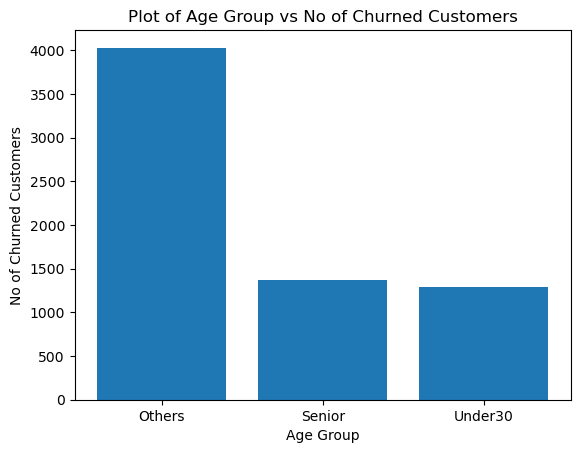

In [454]:
#A plot of the number of customers by age group
plt.bar(viz.index,viz.values)
plt.ylabel('No of Churned Customers')
plt.xlabel('Age Group')
plt.title('Plot of Age Group vs No of Churned Customers')

Text(0.5, 1.0, 'Plot of Churn Rate vs Age Group')

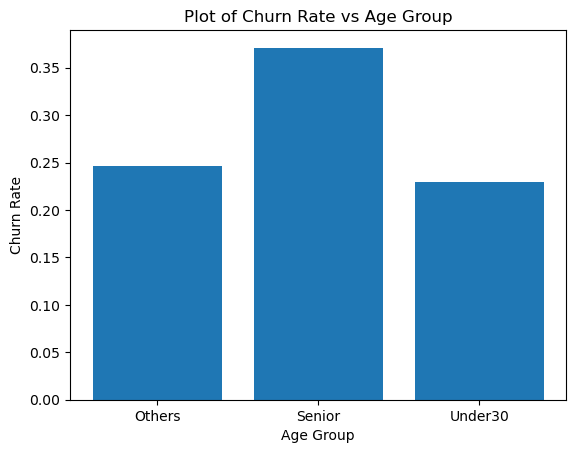

In [455]:
#a plot of churn rate vs age group
plt.bar(viz1.index,viz1.values)
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.title('Plot of Churn Rate vs Age Group')

In [456]:
#From the two diagrams above, it is observed that the Others age group had more customers but the Senior age group had more churn rate.

#since we have created a new column age group we can drop the senior and under 30 columns

dff.drop(['Senior','Under 30'],axis=1,inplace=True)

In [457]:
#getting columns that are categorical
categ_col = dff.dtypes[dff.dtypes == 'object'].index
categ_col

Index(['Intl Active', 'Intl Plan', 'Unlimited Data Plan', 'State', 'Gender',
       'Group', 'Device Protection & Online Backup', 'Contract Type',
       'Payment Method', 'Churn Category', 'Age Group'],
      dtype='object')

In [458]:
#Label Encoding our categorical columns
le = LabelEncoder()
for i in categ_col:
    dff[i] = le.fit_transform(dff[i])

In [459]:
dff

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Age,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Age Group
0,0,1,3,8.0,0.0,0.0,0,0,0.0,0,...,35,0,0,0,0,1,10,10,3,0
1,0,33,179,431.3,0.0,0.0,0,0,0.0,0,...,49,0,0,1,1,2,21,703,3,0
2,0,44,82,217.6,0.0,0.0,0,1,0.0,0,...,51,0,0,1,1,1,23,1014,3,0
3,0,10,47,111.6,60.0,71.0,1,1,0.0,0,...,41,0,0,0,0,2,17,177,3,0
4,0,62,184,621.2,310.0,694.4,1,1,0.0,0,...,51,0,0,0,1,1,28,1720,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6682,1,3,6,16.8,0.0,0.0,0,0,0.0,0,...,42,1,2,0,0,2,19,52,1,0
6683,1,1,7,15.0,0.0,0.0,0,0,0.0,5,...,24,1,3,1,0,1,20,20,1,2
6684,1,6,20,46.9,0.0,0.0,0,0,0.0,4,...,48,1,6,1,0,2,18,108,1,0
6685,1,3,6,15.4,0.0,0.0,0,0,0.0,2,...,45,1,5,0,0,0,15,46,0,0


In [460]:
#confirming if there is still any categorical column, it should return an empty list
dff.dtypes[dff.dtypes == 'object'].index

Index([], dtype='object')

In [461]:
#Investigating further possible redundant columns that may not be of proper use to our model
dff.columns

Index(['Churn Label', 'Account Length (in months)', 'Local Calls',
       'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active', 'Intl Plan',
       'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Gender', 'Age', 'Group', 'Number of Customers in Group',
       'Device Protection & Online Backup', 'Contract Type', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Churn Category', 'Age Group'],
      dtype='object')

Let's build a baseline model to confirm if our assumptions about the following columns [Intl Calls, Intl Mins, Extra International Charges, 
Customer Service Calls & Age] are correct

### BASELINE MODEL BUILDING

In [462]:
# putting models in a dictionary
models = {"DecisionTree Classifier": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "gradientboosting": GradientBoostingClassifier(),
          "KNeighborsRegressor": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
         }

# setting up a function to fit and score model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: training data (no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(42)
    
    # making a dictionary to keep model scores
    model_scores = {}
    
    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(x_train, y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [463]:
X = dff.drop('Churn Label', axis=1)
Y = dff['Churn Label']

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [464]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((5015, 24), (1672, 24), (5015,), (1672,))

In [465]:
%%time
scores = fit_and_score(models=models,
                             x_train=X_train,
                             x_test=X_test,
                             y_train=Y_train,
                             y_test=Y_test)
scores

CPU times: total: 13 s
Wall time: 16.9 s


{'DecisionTree Classifier': 0.9946172248803827,
 'Random Forest': 0.9910287081339713,
 'gradientboosting': 0.9964114832535885,
 'KNeighborsRegressor': 0.756578947368421,
 'SVC': 0.736244019138756,
 'LogisticRegression': 0.8235645933014354}

In [466]:
#using the best performing model
grad = GradientBoostingClassifier()
grad.fit(X_train,Y_train)
y_pred = grad.predict(X_test)

In [467]:
print(f'Accuracy score = {accuracy_score(Y_test,y_pred)}')
print(f'F1 score = {f1_score(Y_test,y_pred)}')
print(f'Precision score = {precision_score(Y_test,y_pred)}')
print(f'Recall score = {recall_score(Y_test,y_pred)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred)}')

Accuracy score = 0.9964114832535885
F1 score = 0.9931818181818182
Precision score = 0.9954441913439636
Recall score = 0.9909297052154195
Confusion matrix =
 [[1229    2]
 [   4  437]]


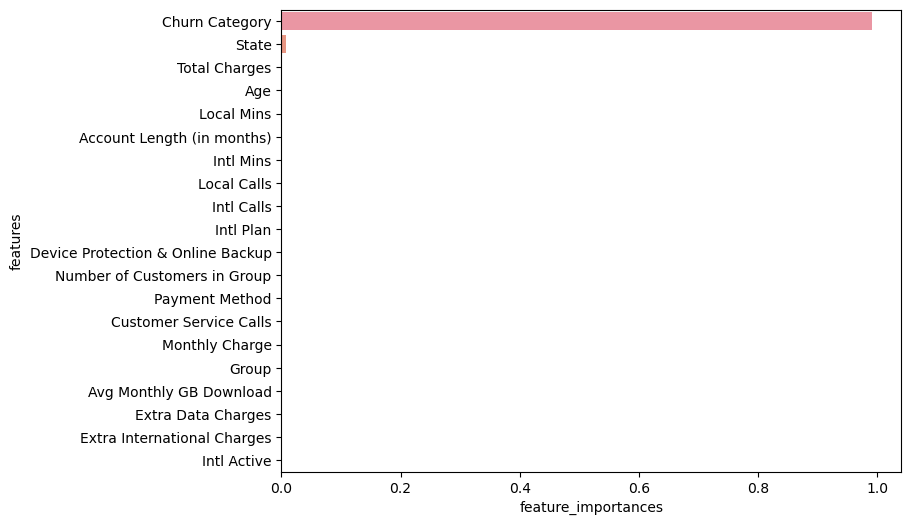

In [468]:
# creating a function for visualing the feature importances

def plot_importances(columns, importances, n=20):
    dfff = (pd.DataFrame({'features': columns,'feature_importances': importances}).sort_values('feature_importances', ascending=False).reset_index(drop=False))

    # plotting the dataframe
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.barplot(x = 'feature_importances', y = 'features', data = dfff[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')

plot_importances(X_train.columns,grad.feature_importances_)

The model was very accurate and looking at the feature importance, the churn category was the major feature that conributed to the accuracy of the model. This should be expected because when there is a churn catogery, the churn label is True or 1.
plot a heatmap to investigate the correlation between the features of the dataset, especially that of churn category and churn label.

<Axes: >

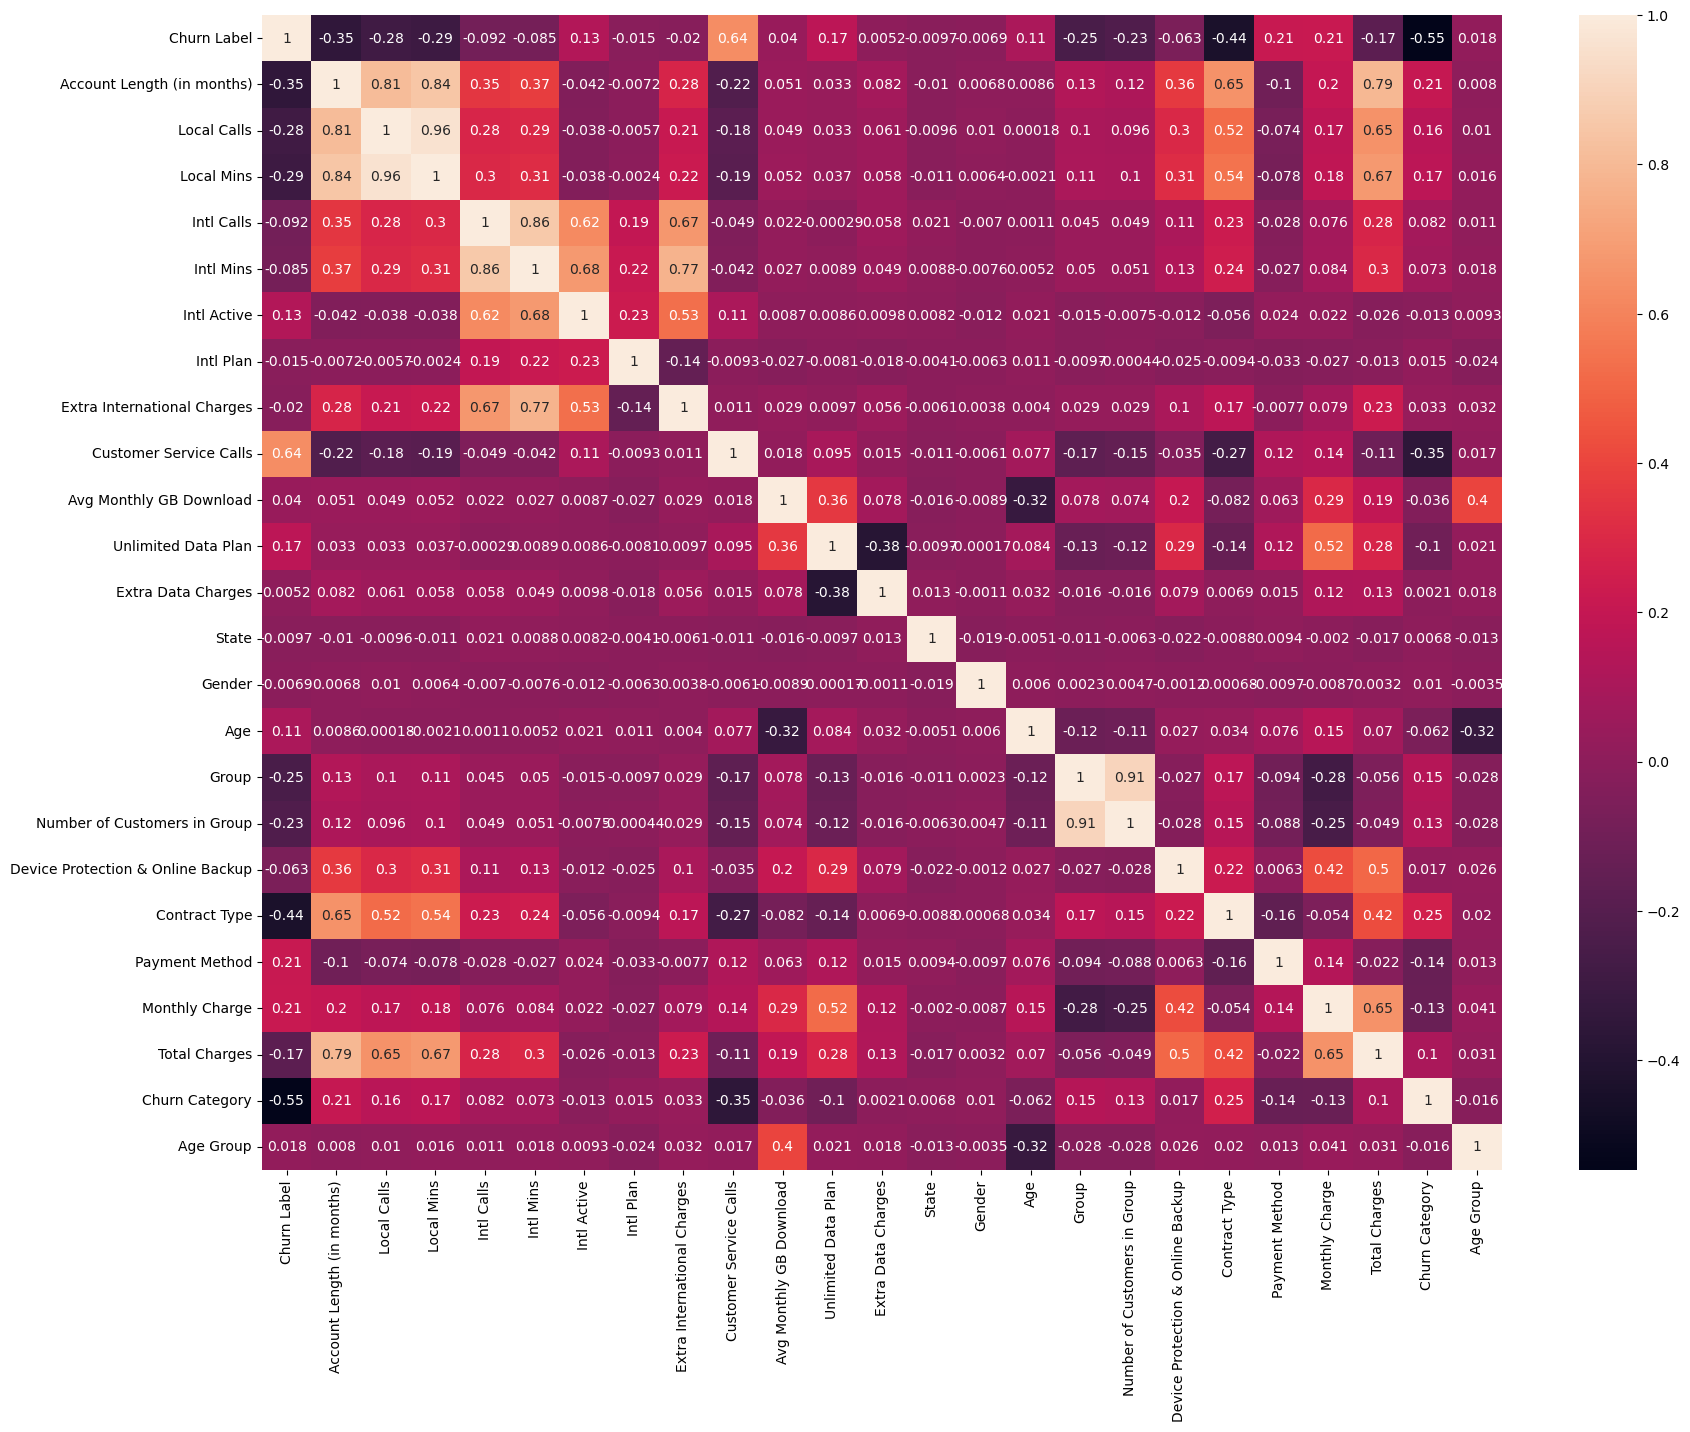

In [469]:
plt.figure(figsize=(20,15))
sns.heatmap(dff.corr(),annot=True)

From the heatmap it obvious that there is a very strong negative correlation between the churn label and churn category.
so it has to be dropped to have a more reliable model because at the time of predicting if a customer will churn or not, the churn category will 
not be available

Also to reduce the number of features in our model it could be useful to drop some of the other strongly correlated features
To prevent assumption lets drop just the churn category, local mins, intl mins and number of customers in group.

In [470]:
X_ = dff.drop(['Churn Label','Churn Category','Local Mins','Intl Mins','Number of Customers in Group'], axis=1)
Y = dff['Churn Label']

X_train, X_test, Y_train,Y_test = train_test_split(X_,Y,test_size=0.25,random_state=42)

In [471]:
#re-run the baseline model code to get the best model with the new update
scores = fit_and_score(models=models,
                             x_train=X_train,
                             x_test=X_test,
                             y_train=Y_train,
                             y_test=Y_test)
scores

{'DecisionTree Classifier': 0.8462918660287081,
 'Random Forest': 0.8965311004784688,
 'gradientboosting': 0.9043062200956937,
 'KNeighborsRegressor': 0.7583732057416268,
 'SVC': 0.736244019138756,
 'LogisticRegression': 0.8588516746411483}

In [472]:
#the best performing baseline model is still the gradient boosting algorithm
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train,Y_train)
y_pred_ = grad_boost.predict(X_test)

In [473]:
print(f'Accuracy score = {accuracy_score(Y_test,y_pred_)}')
print(f'F1 score = {f1_score(Y_test,y_pred_)}')
print(f'Precision score = {precision_score(Y_test,y_pred_)}')
print(f'Recall score = {recall_score(Y_test,y_pred_)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred_)}')

Accuracy score = 0.9043062200956937
F1 score = 0.8062953995157385
Precision score = 0.8649350649350649
Recall score = 0.7551020408163265
Confusion matrix =
 [[1179   52]
 [ 108  333]]


From the metrics above using the accuracy could be misleading, the most important metric to databel will be to know the customers that will churn.
The most important metric in this case will be the recall metric which is quite low (0.755). We need to monitor this score and see to improving 
it by feature engineering. let's investigate the important features that contribute to the prediction.

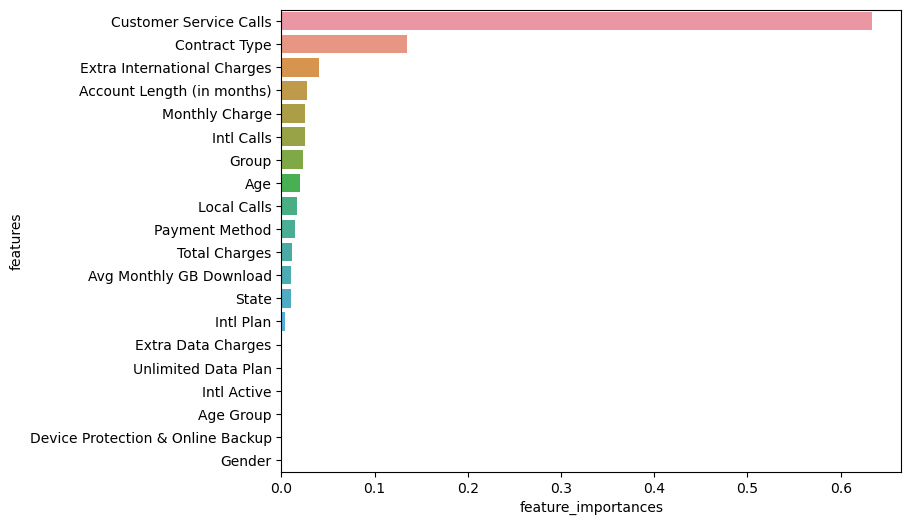

In [474]:
plot_importances(X_train.columns,grad_boost.feature_importances_)

In [475]:
#from the plot above, it is obvious that the most important feature which contributes to a customer churning is the Customer Service Calls
#However some 10 other features contribute to the prediction accuracy.
#We will be discarding the features with less than 0.003 feature importance score.
feat_imp = pd.DataFrame({'columns':X_train.columns,'importance_score':grad_boost.feature_importances_})
feat_imp.sort_values(by='importance_score',ascending=False).reset_index(drop=True)

,columns,importance_score
0,Customer Service Calls,0.633436
1,Contract Type,0.134824
2,Extra International Charges,0.040094
3,Account Length (in months),0.027603
4,Monthly Charge,0.025564
5,Intl Calls,0.024955
6,Group,0.022992
7,Age,0.020321
8,Local Calls,0.016934
9,Payment Method,0.014516


In [476]:
#getting those columns and dropping them in our original dataframe
col_to_drop = feat_imp[feat_imp.importance_score < 0.003]['columns'].to_list()
col_to_drop

['Intl Active',
 'Unlimited Data Plan',
 'Extra Data Charges',
 'Gender',
 'Device Protection & Online Backup',
 'Age Group']

In [477]:
X_1 = dff.drop(['Churn Label','Churn Category','Local Mins','Intl Mins','Number of Customers in Group','Intl Active',
                'Unlimited Data Plan','Extra Data Charges','Gender','Device Protection & Online Backup','Age Group'], axis=1)
                
Y = dff['Churn Label']

X_train, X_test, Y_train,Y_test = train_test_split(X_1,Y,test_size=0.25,random_state=42)

In [478]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((5015, 14), (1672, 14), (5015,), (1672,))

In [479]:
#we will use a cross validation technique to ensure our model generalize well and it is not overfitting, using recall as our scoring metric

results = []
names = []
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='recall_macro')
    results.append(cv_results)
    # evaluating the model and appending its score to model_scores
    names.append(name)
    print(f'{name}: {cv_results.mean()}, {cv_results.std()}')


DecisionTree Classifier: 0.8194598914246937, 0.023905007856918438


Random Forest: 0.846357816350584, 0.017337792283944414
gradientboosting: 0.8546748991035393, 0.017052832690018668
KNeighborsRegressor: 0.6468102878674239, 0.017870417107835455
SVC: 0.5, 0.0
LogisticRegression: 0.7956317189899639, 0.022980541188491292


In [480]:
#From the cross validation above it obvious that our model generalizes well on the training data

#fitting and evaluating the gradientboosting model
grad_boost_new = GradientBoostingClassifier(random_state=42)
grad_boost_new.fit(X_train,Y_train)
y_pred_new = grad_boost_new.predict(X_test)


In [481]:
print(f'Accuracy score = {accuracy_score(Y_test,y_pred_new)}')
print(f'F1 score = {f1_score(Y_test,y_pred_new)}')
print(f'Precision score = {precision_score(Y_test,y_pred_new)}')
print(f'Recall score = {recall_score(Y_test,y_pred_new)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred_new)}')

Accuracy score = 0.9007177033492823
F1 score = 0.8
Precision score = 0.8534704370179949
Recall score = 0.7528344671201814
Confusion matrix =
 [[1174   57]
 [ 109  332]]


In [482]:
#Dropping those columns with feature importance < 0.003 did not improve model performance, however, the drop in accuracy across all metrics
#is negligible, hence the columns were redundant to our model.

#NORMALIZING OUR TRAINING DATA
scaler = MinMaxScaler()
X_train_ = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [483]:
#re-running the model after normalization
grad_boost_norm = GradientBoostingClassifier(random_state=42)
grad_boost_norm.fit(X_train_,Y_train)
y_pred_norm = grad_boost_norm.predict(X_test)

In [489]:
print(f'Accuracy score = {accuracy_score(Y_test,y_pred_norm)}')
print(f'F1 score = {f1_score(Y_test,y_pred_norm)}')
print(f'Precision score = {precision_score(Y_test,y_pred_norm)}')
print(f'Recall score = {recall_score(Y_test,y_pred_norm)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred_norm)}')

Accuracy score = 0.7858851674641149
F1 score = 0.6745454545454546
Precision score = 0.5629742033383915
Recall score = 0.8412698412698413
Confusion matrix =
 [[943 288]
 [ 70 371]]


Normalizing the data improved our recall score from ~75% to ~84%.

Up next we will tune our model to further improve our accuracy using RandomizeSearchCV.
GridSearchCV took a long time so I had to opt for RandomizedSearchCV due to my parameter grid.

In [ ]:
param_grid = {
    'loss':['log_loss','exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[1, 10, 100, 1000],
    'max_depth':[3, 5, 7, 9, 15],
    'min_samples_split':[5, 10, 15],
    'min_samples_leaf':[1, 5, 10],
    'random_state': [27,54,100]
}

rand_search = RandomizedSearchCV(grad_cv,param_grid,cv=5,scoring='recall_macro',n_iter=500,return_train_score=True)

rand_search.fit(X_train_,Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=500,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 15],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [1, 10, 100, 1000],
                                        'random_state': [27, 54, 100]},
                   return_train_score=True, scoring='recall_macro')

In [ ]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'random_state': 54, 'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 5, 'loss': 'log_loss', 'learning_rate': 0.01}
0.8607313532151716


In [490]:
#Running the model after hyperparameter tuning using the best paramters above
grad_boost_tuned = GradientBoostingClassifier(random_state=42,
                                              n_estimators=1000, 
                                              min_samples_split=15, 
                                              min_samples_leaf=5, 
                                              max_depth=None, 
                                              loss='log_loss', 
                                              learning_rate=0.01)
#grad_boost_tuned = GradientBoostingClassifier(random_state=42)
grad_boost_tuned.fit(X_train_,Y_train)
y_pred_tuned = grad_boost_tuned.predict(X_test)

In [491]:
print(f'Accuracy score = {accuracy_score(Y_test,y_pred_tuned)}')
print(f'F1 score = {f1_score(Y_test,y_pred_tuned)}')
print(f'Precision score = {precision_score(Y_test,y_pred_tuned)}')
print(f'Recall score = {recall_score(Y_test,y_pred_tuned)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred_tuned)}')

Accuracy score = 0.791267942583732
F1 score = 0.6679352997145575
Precision score = 0.5754098360655737
Recall score = 0.7959183673469388
Confusion matrix =
 [[972 259]
 [ 90 351]]


In [492]:
#From the tuned model above the result is not better, so we stick to the model after the normalization, and seek further ways to improve the model
grad_boost_norm = GradientBoostingClassifier(random_state=42)
grad_boost_norm.fit(X_train_,Y_train)
y_pred_norm = grad_boost_norm.predict(X_test)

print(f'Accuracy score = {accuracy_score(Y_test,y_pred_norm)}')
print(f'F1 score = {f1_score(Y_test,y_pred_norm)}')
print(f'Precision score = {precision_score(Y_test,y_pred_norm)}')
print(f'Recall score = {recall_score(Y_test,y_pred_norm)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred_norm)}')

Accuracy score = 0.7858851674641149
F1 score = 0.6745454545454546
Precision score = 0.5629742033383915
Recall score = 0.8412698412698413
Confusion matrix =
 [[943 288]
 [ 70 371]]


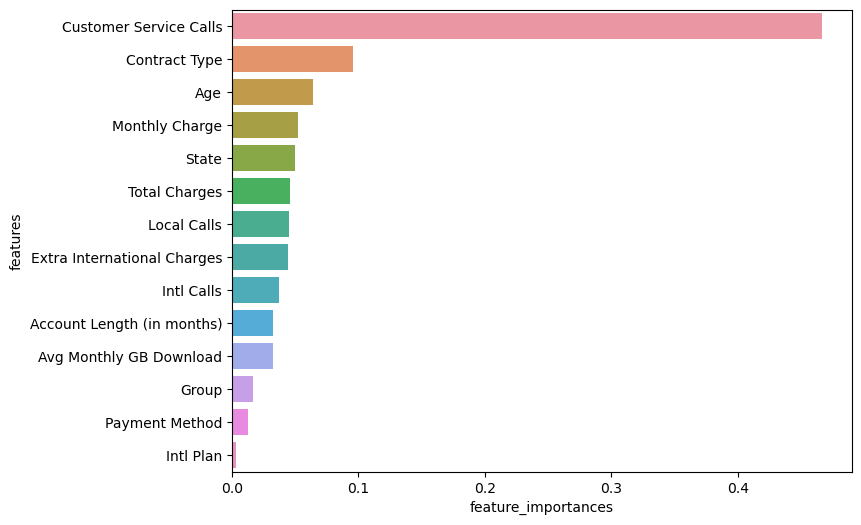

In [493]:
#investigating the features that contributed to the prediction accuracy
plot_importances(X_train_.columns,grad_boost_tuned.feature_importances_)

After proper investigation of the important features, the features with lower importance scores were dropped, after the trial and error,
four more features were dropped to increase the prediction accuracy, that is the bottom four features in the feature importance plot

In [494]:
X_1 = dff.drop(['Churn Label','Churn Category','Local Mins','Intl Mins','Number of Customers in Group','Intl Active',
                'Unlimited Data Plan','Extra Data Charges','Gender','Device Protection & Online Backup','Age Group',
                'Intl Plan','Payment Method','Group','Avg Monthly GB Download'], axis=1)
                
Y = dff['Churn Label']

X_train, X_test, Y_train,Y_test = train_test_split(X_1,Y,test_size=0.25,random_state=42)

scaler = MinMaxScaler()
X_train_ = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

grad_boost_norm = GradientBoostingClassifier(random_state=42)
grad_boost_norm.fit(X_train_,Y_train)
y_pred_norm = grad_boost_norm.predict(X_test)

print(f'Accuracy score = {accuracy_score(Y_test,y_pred_norm)}')
print(f'F1 score = {f1_score(Y_test,y_pred_norm)}')
print(f'Precision score = {precision_score(Y_test,y_pred_norm)}')
print(f'Recall score = {recall_score(Y_test,y_pred_norm)}')
print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred_norm)}')

Accuracy score = 0.6028708133971292
F1 score = 0.5625823451910408
Precision score = 0.39647168059424326
Recall score = 0.9682539682539683
Confusion matrix =
 [[581 650]
 [ 14 427]]


After this feature engineering process the recall score increased from ~84% to ~96%. This is a very huge increase.
Having important features in our model give the best accuracy. The next step will be to save the model using joblib and create simple functions like `fitting and prediction`, `prediction` on unseen data and a `single point prediction`


In [495]:
data = pd.read_csv('Databel.csv')

train_data = data[:5000]
test_data = data[5000:].drop('Churn Label',axis=1)
y_true = data[5000:]['Churn Label']

In [496]:
y_true.shape, test_data.shape

((1687,), (1687, 28))

In [497]:
#creating a custom function to perform all necessary task from data cleaning to prediction
def fit_and_predict(data):

    le = LabelEncoder()
    for i in data.columns:
        data[i] = le.fit_transform(data[i])
    
    X = data.drop(['Customer ID','Phone Number','Churn Reason','Churn Label','Churn Category','Local Mins','Intl Mins',
                   'Number of Customers in Group',
                   'Intl Active','Unlimited Data Plan','Extra Data Charges','Gender','Device Protection & Online Backup',
                   'Intl Plan','Payment Method','Group','Avg Monthly GB Download','Senior','Under 30'], axis=1)
                
    Y = data['Churn Label']

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

    grad = GradientBoostingClassifier(random_state=42)
    grad.fit(X_train,Y_train)

    filename = 'churn_model.sav'
    joblib.dump(grad,filename)
    
    y_pred = grad.predict(X_test)

    print('============================================')
    print(f'Recall score = {recall_score(Y_test,y_pred)}')
    print('============================================')
    print(f'Confusion matrix =\n {confusion_matrix(Y_test,y_pred)}')

In [498]:
fit_and_predict(train_data)

Recall score = 0.9897435897435898
Confusion matrix =
 [[400 460]
 [  4 386]]


In [499]:
def predict(data):
    data = data.drop(['Customer ID','Phone Number','Churn Reason','Churn Category','Local Mins','Intl Mins',
                   'Number of Customers in Group','Intl Active','Unlimited Data Plan','Extra Data Charges','Gender',
                   'Device Protection & Online Backup',
                   'Intl Plan','Payment Method','Group','Avg Monthly GB Download','Senior','Under 30'], axis=1)
    
    le = LabelEncoder()
    for i in data.columns:
        data[i] = le.fit_transform(data[i])

    model = joblib.load('churn_model.sav')
    prediction = model.predict(data)
    return prediction

In [500]:
y_pred = predict(test_data)

In [501]:
y_true = y_true.apply(encode)

In [502]:
recall_score(y_true,y_pred)

0.9811320754716981

In [503]:
def single_datapoint_prediction(data):

    features_to_drop = ['Customer ID','Phone Number','Churn Reason','Churn Label','Churn Category','Local Mins','Intl Mins',
                   'Number of Customers in Group','Churn Label','Churn Category','Local Mins','Intl Mins','Number of Customers in Group',
                   'Intl Active','Unlimited Data Plan','Extra Data Charges','Gender','Device Protection & Online Backup',
                   'Intl Plan','Payment Method','Group','Avg Monthly GB Download','Senior','Under 30']
    for i in data.index:
        if i in features_to_drop:
            data = data.drop(i)
        else:
            pass
    
    for i in data.index:
        if i == 'State':
            x = data['State']
            for a,b in dict(zip(sorted(df.State.unique()),sorted(X.State.unique()))).items():
                if a == x:
                    data['State'] = b
                else:
                    pass
        else:
            pass
    
    for i in data.index:
        if i == 'Contract Type':
            x = data['Contract Type']
            for a,b in dict(zip(sorted(df['Contract Type'].unique()),sorted(X['Contract Type'].unique()))).items():
                if a == x:
                    data['Contract Type'] = b
                else:
                    pass
        else:
            pass

    pred = pd.DataFrame(data.to_dict(),index=[0])
    model = joblib.load('churn_model.sav')
    churn_label = model.predict(pred)
    return churn_label
    


In [504]:
data_point = test_data.iloc[10]
data_point

Customer ID                               7062-FUCZ
Account Length (in months)                        1
Local Calls                                       4
Local Mins                                     10.0
Intl Calls                                      0.0
Intl Mins                                       0.0
Intl Active                                      No
Intl Plan                                        no
Extra International Charges                     0.0
Customer Service Calls                            2
Avg Monthly GB Download                           7
Unlimited Data Plan                             Yes
Extra Data Charges                                0
State                                            VA
Phone Number                               311-6924
Gender                                         Male
Age                                              59
Under 30                                         No
Senior                                           No
Group       

In [505]:
single_datapoint_prediction(data_point)

array([1])

#### After careful analysis, a model with over 98% accuracy was built. This model will help Databel to predict if a customer will churn or not, with over 98% confidence.

#### Thank you!!!